In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
xmin = -10
xmax = 10
dim = 10
pres = 3
longitud = int(math.log2( (xmax-xmin)*(10**pres) )+0.9)
prob_mut = 0.03
pobsize = 50
num_padres = pobsize
num_generaciones = 5000
dim_disc = dim * longitud

In [3]:
longitud

15

In [4]:
def bin2dec(bin_str):
    return int(''.join(str(x) for x in bin_str), 2)

In [5]:
def vbin2vdec(vbin, bits_per_var=longitud, num_vars=dim, vmin=xmin, vmax=xmax):
    vdec = []
    max_dec = 2**bits_per_var - 1
    for i in range(num_vars):
        bin_segment = vbin[i*bits_per_var:(i+1)*bits_per_var]
        dec = bin2dec(bin_segment)
        scaled_val = vmin + ((vmax - vmin) / max_dec) * dec
        vdec.append(scaled_val)
    return vdec

In [6]:
def aptitud(vbin):
    vdec = vbin2vdec(vbin)
    return np.sum(np.square(vdec)) 


def evaluar_aptitud(individuos):
    return [aptitud(ind) for ind in individuos]

In [7]:
def generate_pob(pobsize):
    pob = []
    for i in range(pobsize):        
        vector = np.random.randint(0, 2, size=dim_disc)
        pob.append(vector)
    return pob

In [8]:
def crossover_uniforme(v1, v2):
    mascara = np.random.randint(0, 2, size=len(v1)).astype(bool)
    inversa_mascara = np.logical_not(mascara)
    h1 = np.where(mascara, v1, v2)
    h2 = np.where(mascara, v2, v1)
    return h1, h2

In [9]:
def mutacion_uniforme_binaria(vector, prob_mut):
    mascara = np.random.random(size=len(vector)) < prob_mut
    vector[mascara] = 1 - vector[mascara]    
    return vector

* Calcula la aptitud total de la población para determinar el tamaño de los "segmentos" de la ruleta para cada individuo.
* Establece un punto de inicio aleatorio y un intervalo constante (punto de ruleta) para realizar la selección.
* Recorre la población, acumulando la aptitud y seleccionando individuos cuando la aptitud acumulada supera los puntos establecidos por el intervalo.

In [10]:
def seleccion_universal_estocastica(individuos, num_padres):
    n = len(individuos)
    aptitudes = evaluar_aptitud(individuos)
    aptitudes_invertidas = [1.0 / max(aptitud, 1e-8) for aptitud in aptitudes]  
    total_aptitud = sum(aptitudes_invertidas)
    intervalo = total_aptitud / num_padres
    inicio = random.uniform(0, intervalo)
    puntos = [inicio + i * intervalo for i in range(num_padres)]
    
    aptitudes_acumulativas = []
    suma_acumulada = 0
    for aptitud in aptitudes_invertidas:
        suma_acumulada += aptitud
        aptitudes_acumulativas.append(suma_acumulada)
    
    seleccionados = []
    for punto in puntos:
        for i, aptitud_acum in enumerate(aptitudes_acumulativas):
            if aptitud_acum >= punto:
                seleccionados.append(individuos[i])
                break
    
    return seleccionados

In [11]:
def algoritmo_genetico(pobsize, num_generaciones, prob_mut, num_padres):
    # Paso 1: Inicialización
    best = []
    poblacion = generate_pob(pobsize)
    
    for generacion in range(num_generaciones):
        # Paso 2: Selección
        seleccionados = seleccion_universal_estocastica(poblacion, num_padres)
        
        # Paso 3: Cruzamiento
        nueva_poblacion = []
        for i in range(0, len(seleccionados), 2):
            padre1 = seleccionados[i]
            padre2 = seleccionados[i+1] if i+1 < len(seleccionados) else seleccionados[0]
            hijo1, hijo2 = crossover_uniforme(padre1, padre2)
            nueva_poblacion.extend([hijo1, hijo2])
        
        # Paso 4: Mutación
        poblacion_mutada = [mutacion_uniforme_binaria(ind, prob_mut) for ind in nueva_poblacion]
        
        # Paso 5: Evaluación y Reemplazo por los Mejores
        poblacion.extend(poblacion_mutada)
        poblacion.sort(key=lambda ind: aptitud(ind))
        poblacion = poblacion[:pobsize]  # Conserva solo los mejores de tamaño pobsize
        
        # Imprimir el mejor individuo
        mejor_individuo = poblacion[0]
        #print(f"Mejor  Aptitud: {aptitud(mejor_individuo)}")
        best.append(aptitud(mejor_individuo))

    return poblacion, best


In [12]:
x=algoritmo_genetico(pobsize, num_generaciones, prob_mut, num_padres)

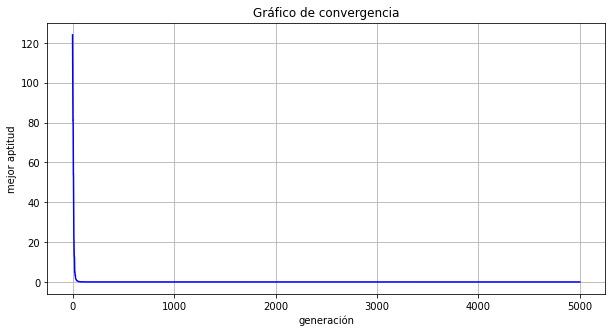

In [13]:
plt.figure(figsize=(10, 5))  # Crea una figura con un tamaño específico
plt.plot(x[1],  linestyle='-', color='b')
plt.title('Gráfico de convergencia')  
plt.xlabel('generación')  
plt.ylabel('mejor aptitud')  
plt.grid(True)

plt.show()

In [14]:
print(aptitud(x[0][0]))

9.313794206364775e-07


In [15]:
vec = np.random.randint(0,2,size=150)

In [16]:
print(vec)

[0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0]


In [17]:
vbin2vdec(vec)

[-3.144322031311991,
 -4.942472609637745,
 1.4792321543015845,
 9.944456312753687,
 6.750389110995819,
 9.916379284035767,
 -5.966673787652211,
 0.7058931241798145,
 -3.7687307351908936,
 9.961546678060245]